In [1]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('restaurant_customer_satisfaction.csv')

percentage = 0.3
data[:int(len(data)*percentage):]

,CustomerID,Age,Gender,Income,VisitFrequency,AverageSpend,PreferredCuisine,TimeOfVisit,GroupSize,DiningOccasion,MealType,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating,HighSatisfaction
0,654,35,Male,83380,Weekly,27.829142,Chinese,Breakfast,3,Business,Takeaway,0,1,1,43.523929,2,5,4,0
1,655,19,Male,43623,Rarely,115.408622,American,Dinner,1,Casual,Dine-in,0,0,0,57.524294,5,5,3,0
2,656,41,Female,83737,Weekly,106.693771,American,Dinner,6,Celebration,Dine-in,0,1,0,48.682623,3,4,5,0
3,657,43,Male,96768,Rarely,43.508508,Indian,Lunch,1,Celebration,Dine-in,0,0,0,7.552993,4,5,1,0
4,658,55,Female,67937,Monthly,148.084627,Chinese,Breakfast,1,Business,Takeaway,0,0,1,37.789041,2,3,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,1099,21,Female,90253,Monthly,32.297380,Indian,Lunch,9,Celebration,Takeaway,0,1,0,9.364399,3,1,1,0
446,1100,39,Female,88776,Weekly,86.679614,Chinese,Breakfast,4,Casual,Dine-in,0,1,0,22.182998,4,5,3,1
447,1101,45,Male,62363,Weekly,171.651162,Chinese,Breakfast,2,Business,Dine-in,0,1,1,2.130986,1,3,3,0
448,1102,32,Female,124333,Monthly,199.750152,Mexican,Breakfast,9,Business,Dine-in,1,1,0,11.862812,2,1,1,0


In [2]:
# remove unused columns
data = data.drop(columns=['CustomerID','Age','Gender','Income','VisitFrequency','PreferredCuisine','TimeOfVisit','GroupSize','DiningOccasion',
'MealType','OnlineReservation','DeliveryOrder','LoyaltyProgramMember','FoodRating','AmbianceRating','HighSatisfaction'])

# save data to csv
data.to_csv('cleaned_data.csv', index=False)

In [3]:
# data = pd.read_csv('cleaned_data.csv')

# # sort data by WaitTime
# data = data.sort_values(by='WaitTime', ascending=True)
# data.head()

# # sort data by ServiceRating
# data = data.sort_values(by='ServiceRating', ascending=True)
# data.head()

# # sort data by AverageSpend
# data = data.sort_values(by='AverageSpend', ascending=True)
# data.head()


c:\Users\Malv\Downloads\class\ai lab\ai-venv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


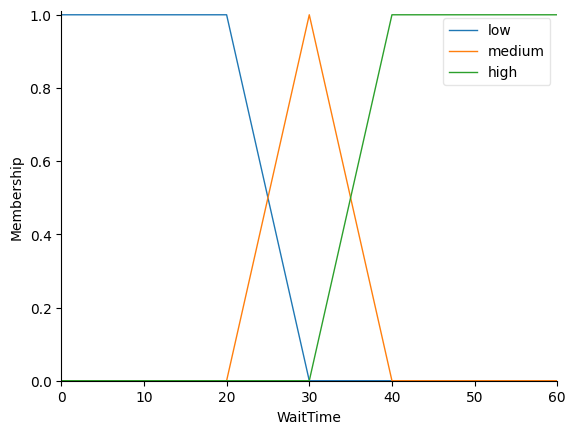

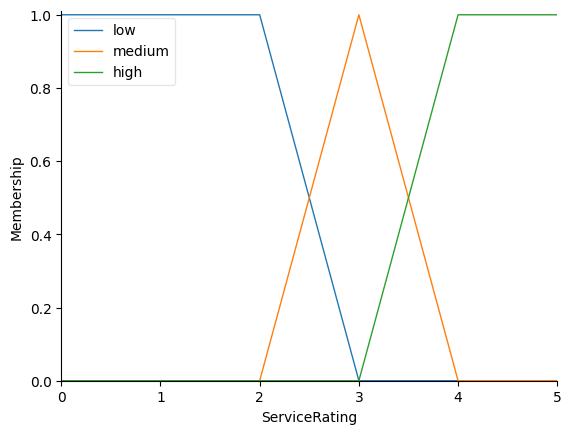

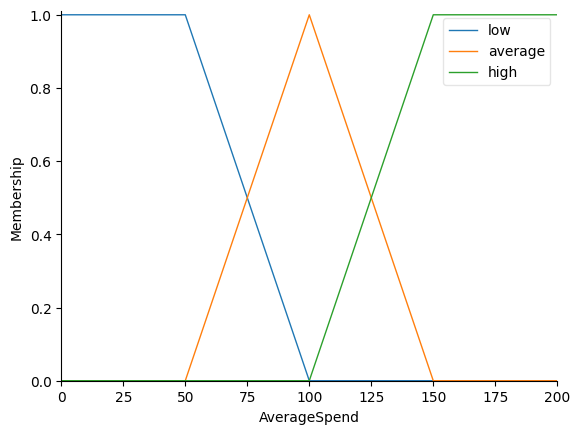

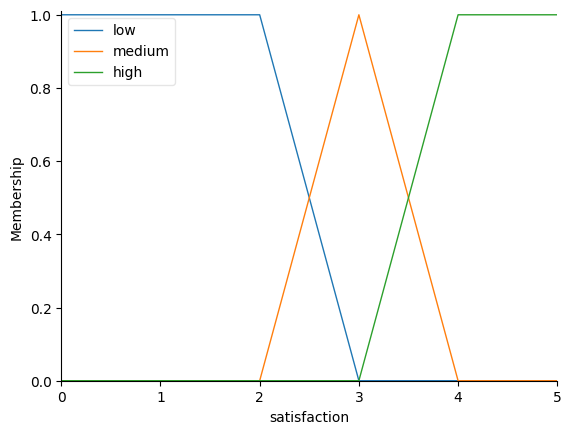

In [4]:
# use data
data = pd.read_csv('cleaned_data.csv')

# Define the universal variables
WaitTime = ctrl.Antecedent(np.arange(0, 60 + 1, 1), 'WaitTime')
ServiceRating = ctrl.Antecedent(np.arange(0, 6, 1), 'ServiceRating')
AverageSpend = ctrl.Antecedent(np.arange(0, 200 + 1, 1), 'AverageSpend')
satisfaction = ctrl.Consequent(np.arange(0, 6, 1), 'satisfaction')

# WaitTime Membership Functions
WaitTime['low'] = fuzz.trapmf(WaitTime.universe, [0, 0, 20, 30])
WaitTime['medium'] = fuzz.trimf(WaitTime.universe, [20, 30, 40])
WaitTime['high'] = fuzz.trapmf(WaitTime.universe, [30, 40, 60, 60])

# ServiceRating Membership Functions
ServiceRating['low'] = fuzz.trapmf(ServiceRating.universe, [0, 0, 2, 3])
ServiceRating['medium'] = fuzz.trimf(ServiceRating.universe, [2, 3, 4])
ServiceRating['high'] = fuzz.trapmf(ServiceRating.universe, [3, 4, 5, 5])

# AverageSpend Membership Functions
AverageSpend['low'] = fuzz.trapmf(AverageSpend.universe, [0, 0, 50, 100])
AverageSpend['average'] = fuzz.trimf(AverageSpend.universe, [50, 100, 150])
AverageSpend['high'] = fuzz.trapmf(AverageSpend.universe, [100, 150, 200, 200])

# satisfaction Membership Functions
satisfaction['low'] = fuzz.trapmf(satisfaction.universe, [0, 0, 2, 3])
satisfaction['medium'] = fuzz.trimf(satisfaction.universe, [2, 3, 4])
satisfaction['high'] = fuzz.trapmf(satisfaction.universe, [3, 4, 5, 5])

WaitTime.view()
ServiceRating.view()
AverageSpend.view()
satisfaction.view()
plt.show()

In [5]:
# Rule Base
rule1 = ctrl.Rule(WaitTime['low'] & ServiceRating['low'] & AverageSpend['low'], satisfaction['low'])
rule2 = ctrl.Rule(WaitTime['low'] & ServiceRating['low'] & AverageSpend['average'], satisfaction['medium'])
rule3 = ctrl.Rule(WaitTime['low'] & ServiceRating['low'] & AverageSpend['high'], satisfaction['high'])
rule4 = ctrl.Rule(WaitTime['low'] & ServiceRating['medium'] & AverageSpend['low'], satisfaction['low'])
rule5 = ctrl.Rule(WaitTime['low'] & ServiceRating['medium'] & AverageSpend['average'], satisfaction['medium'])
rule6 = ctrl.Rule(WaitTime['low'] & ServiceRating['medium'] & AverageSpend['high'], satisfaction['high'])
rule7 = ctrl.Rule(WaitTime['low'] & ServiceRating['high'] & AverageSpend['low'], satisfaction['low'])
rule8 = ctrl.Rule(WaitTime['low'] & ServiceRating['high'] & AverageSpend['average'], satisfaction['medium'])
rule9 = ctrl.Rule(WaitTime['low'] & ServiceRating['high'] & AverageSpend['high'], satisfaction['high'])
rule10 = ctrl.Rule(WaitTime['medium'] & ServiceRating['low'] & AverageSpend['low'], satisfaction['low'])
rule11 = ctrl.Rule(WaitTime['medium'] & ServiceRating['low'] & AverageSpend['average'], satisfaction['medium'])
rule12 = ctrl.Rule(WaitTime['medium'] & ServiceRating['low'] & AverageSpend['high'], satisfaction['high'])
rule13 = ctrl.Rule(WaitTime['medium'] & ServiceRating['medium'] & AverageSpend['low'], satisfaction['low'])
rule14 = ctrl.Rule(WaitTime['medium'] & ServiceRating['medium'] & AverageSpend['average'], satisfaction['medium'])
rule15 = ctrl.Rule(WaitTime['medium'] & ServiceRating['medium'] & AverageSpend['high'], satisfaction['high'])
rule16 = ctrl.Rule(WaitTime['medium'] & ServiceRating['high'] & AverageSpend['low'], satisfaction['low'])
rule17 = ctrl.Rule(WaitTime['medium'] & ServiceRating['high'] & AverageSpend['average'], satisfaction['medium'])
rule18 = ctrl.Rule(WaitTime['medium'] & ServiceRating['high'] & AverageSpend['high'], satisfaction['high'])
rule19 = ctrl.Rule(WaitTime['high'] & ServiceRating['low'] & AverageSpend['low'], satisfaction['low'])
rule20 = ctrl.Rule(WaitTime['high'] & ServiceRating['low'] & AverageSpend['average'], satisfaction['medium'])
rule21 = ctrl.Rule(WaitTime['high'] & ServiceRating['low'] & AverageSpend['high'], satisfaction['high'])
rule22 = ctrl.Rule(WaitTime['high'] & ServiceRating['medium'] & AverageSpend['low'], satisfaction['low'])
rule23 = ctrl.Rule(WaitTime['high'] & ServiceRating['medium'] & AverageSpend['average'], satisfaction['medium'])
rule24 = ctrl.Rule(WaitTime['high'] & ServiceRating['medium'] & AverageSpend['high'], satisfaction['high'])
rule25 = ctrl.Rule(WaitTime['high'] & ServiceRating['high'] & AverageSpend['low'], satisfaction['low'])
rule26 = ctrl.Rule(WaitTime['high'] & ServiceRating['high'] & AverageSpend['average'], satisfaction['medium'])
rule27 = ctrl.Rule(WaitTime['high'] & ServiceRating['high'] & AverageSpend['high'], satisfaction['high'])

# Build the control system
satisfaction_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9,
rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25, rule26, rule27])

# Function to compute satisfaction
def compute_satisfaction(row):
    try:
        # Create a new simulation instance for each row
        satisfaction_simulation = ctrl.ControlSystemSimulation(satisfaction_ctrl)
        
        # Get input values
        wait_time = row['WaitTime']
        service = row['ServiceRating']
        spend = row['AverageSpend']
        
        # Set inputs
        satisfaction_simulation.input['WaitTime'] = wait_time
        satisfaction_simulation.input['ServiceRating'] = service
        satisfaction_simulation.input['AverageSpend'] = spend
        
        # Compute the fuzzy result
        satisfaction_simulation.compute()
        
        # Return the satisfaction value
        return satisfaction_simulation.output['satisfaction']
    
    except Exception as ex:
        print(f"Error computing for row {row.name}: {ex}")
        print(f"Inputs: WaitTime={wait_time}, ServiceRating={service}, AverageSpend={spend}")
        return np.nan

# Apply the fuzzy logic model to the dataset
data['satisfaction'] = data.apply(compute_satisfaction, axis=1)

# Check for NaN values
nan_count = data['satisfaction'].isna().sum()
print(f"Number of rows with NaN satisfaction: {nan_count}")

Number of rows with NaN satisfaction: 0


In [ ]:
# Define a function to classify the movies
def classify_satisfaction(score):
    if score >= 4.0:
        return 'High'
    elif score >= 2.5:
        return 'Medium'
    else:
        return 'Low'

#Service Quality Impact
def service_quality_impact(row):
    # High service quality with low satisfaction indicates service isn't the main issue
    if row['ServiceRating'] >= 4 and row['satisfaction_category'] == 'Low':
        return "Service quality is good, but other factors are causing dissatisfaction"
    # Low service quality with high satisfaction indicates service isn't critical
    elif row['ServiceRating'] <= 2.5 and row['satisfaction_category'] == 'High':
        return "Service quality is poor, but customers are satisfied anyway"
    # Service quality matches satisfaction level
    elif row['ServiceRating'] >= 4 and row['satisfaction_category'] == 'High':
        return "Excellent service quality is driving high satisfaction"
    elif row['ServiceRating'] <= 2.5 and row['satisfaction_category'] == 'Low':
        return "Poor service quality is causing dissatisfaction"
    else:
        return "Service quality has moderate impact on satisfaction"

# Wait Time Impact
def wait_time_impact(row):
    # Long wait times with high satisfaction indicates wait time isn't critical
    if row['WaitTime'] >= 40 and row['satisfaction_category'] == 'High':
        return "Long wait times, but customers are still satisfied"
    # Short wait times with low satisfaction indicates other issues
    elif row['WaitTime'] <= 20 and row['satisfaction_category'] == 'Low':
        return "Short wait times, but customers are dissatisfied"
    # Wait time matches satisfaction level
    elif row['WaitTime'] <= 20 and row['satisfaction_category'] == 'High':
        return "Short wait times are contributing to high satisfaction"
    elif row['WaitTime'] >= 40 and row['satisfaction_category'] == 'Low':
        return "Long wait times are causing dissatisfaction"
    else:
        return "Wait time has moderate impact on satisfaction"

finaldata = data.sort_values(by='satisfaction', ascending=False)
finaldata['satisfaction_category'] = finaldata['satisfaction'].apply(classify_satisfaction)
finaldata['ServiceQuality_Impact'] = finaldata.apply(service_quality_impact, axis=1)
finaldata['WaitTime_Impact'] = finaldata.apply(wait_time_impact, axis=1)

print("\nDataset with Insight Columns:")
print(finaldata[['WaitTime', 'ServiceRating', 'AverageSpend', 'satisfaction', 'satisfaction_category', 
                'ServiceQuality_Impact', 'WaitTime_Impact']].head(10))

finaldata.to_csv('satisfaction.csv', index=False)
print(f"Final dataset size: {len(finaldata)} rows")

saved_data = pd.read_csv('satisfaction.csv')
print(f"\nSaved CSV file contains {len(saved_data)} rows")


Dataset with Insight Columns:
       WaitTime  ServiceRating  AverageSpend  satisfaction  \
12     4.710546              5    156.130808      4.222222   
910   47.945040              5    160.895615      4.222222   
911   50.025319              5    154.220971      4.222222   
914   49.371855              4    161.782243      4.222222   
31    55.660175              3    173.872310      4.222222   
38    42.905875              5    154.462649      4.222222   
39    48.388874              1    170.145409      4.222222   
1467  18.201694              2    191.488799      4.222222   
879   57.541253              4    184.261421      4.222222   
883   52.720987              5    198.489279      4.222222   

     satisfaction_category                              ServiceQuality_Impact  \
12                    High  Excellent service quality is driving high sati...   
910                   High  Excellent service quality is driving high sati...   
911                   High  Excellent servi


Service Quality Impact Distribution:
ServiceQuality_Impact
Service quality has moderate impact on satisfaction                       643
Poor service quality is causing dissatisfaction                           262
Service quality is good, but other factors are causing dissatisfaction    248
Excellent service quality is driving high satisfaction                    180
Service quality is poor, but customers are satisfied anyway               167
Name: count, dtype: int64

Wait Time Impact Distribution:
WaitTime_Impact
Wait time has moderate impact on satisfaction             788
Short wait times, but customers are dissatisfied          214
Long wait times are causing dissatisfaction               202
Long wait times, but customers are still satisfied        162
Short wait times are contributing to high satisfaction    134
Name: count, dtype: int64


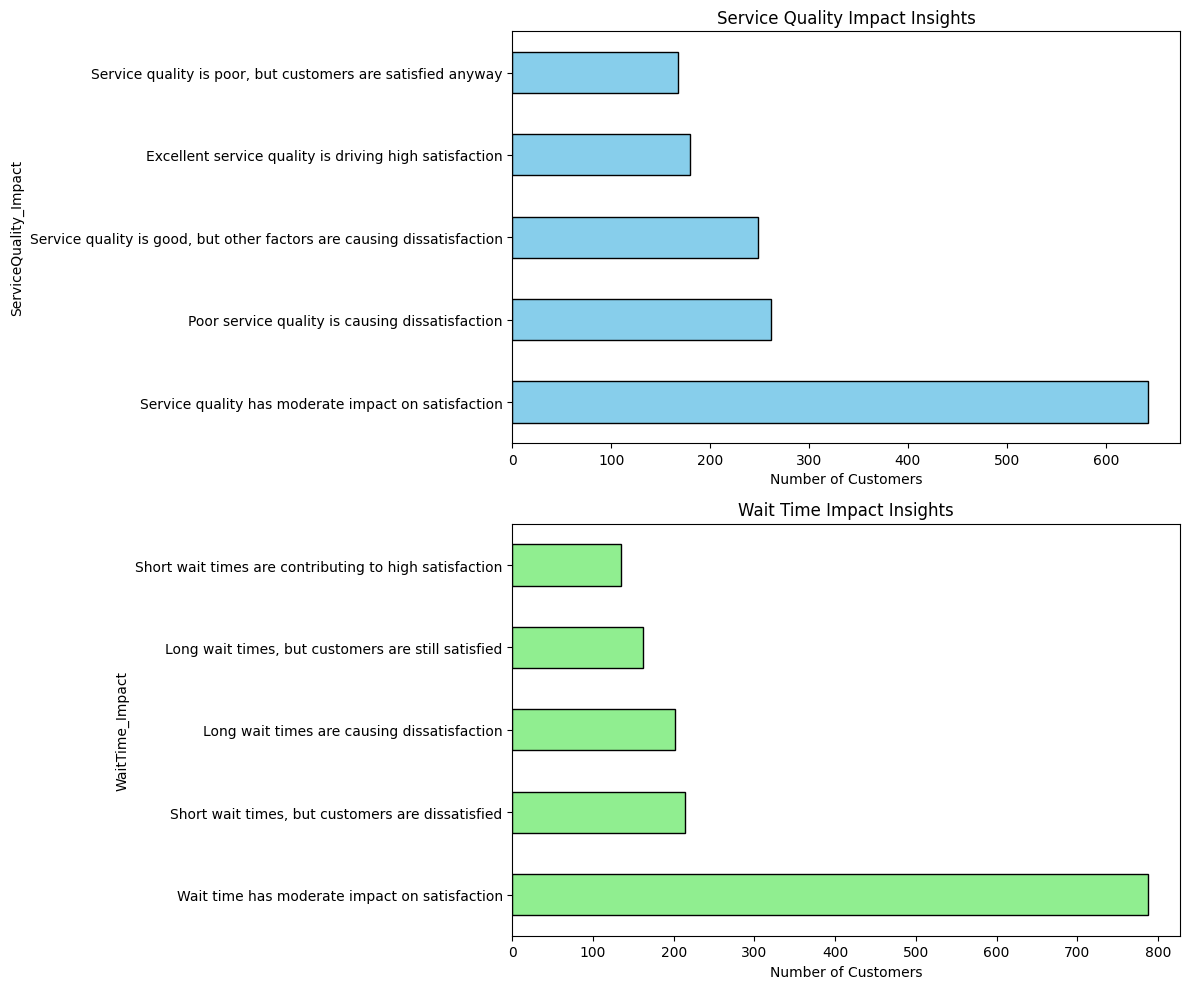

In [7]:

# Analyze the distribution of insights
print("\nService Quality Impact Distribution:")
print(finaldata['ServiceQuality_Impact'].value_counts())

print("\nWait Time Impact Distribution:")
print(finaldata['WaitTime_Impact'].value_counts())

# Visualize the insights
plt.figure(figsize=(12, 10))

# Service Quality Impact
plt.subplot(2, 1, 1)
service_impact_counts = finaldata['ServiceQuality_Impact'].value_counts()
service_impact_counts.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Service Quality Impact Insights')
plt.xlabel('Number of Customers')
plt.tight_layout()

# Wait Time Impact
plt.subplot(2, 1, 2)
wait_impact_counts = finaldata['WaitTime_Impact'].value_counts()
wait_impact_counts.plot(kind='barh', color='lightgreen', edgecolor='black')
plt.title('Wait Time Impact Insights')
plt.xlabel('Number of Customers')
plt.tight_layout()

plt.show()

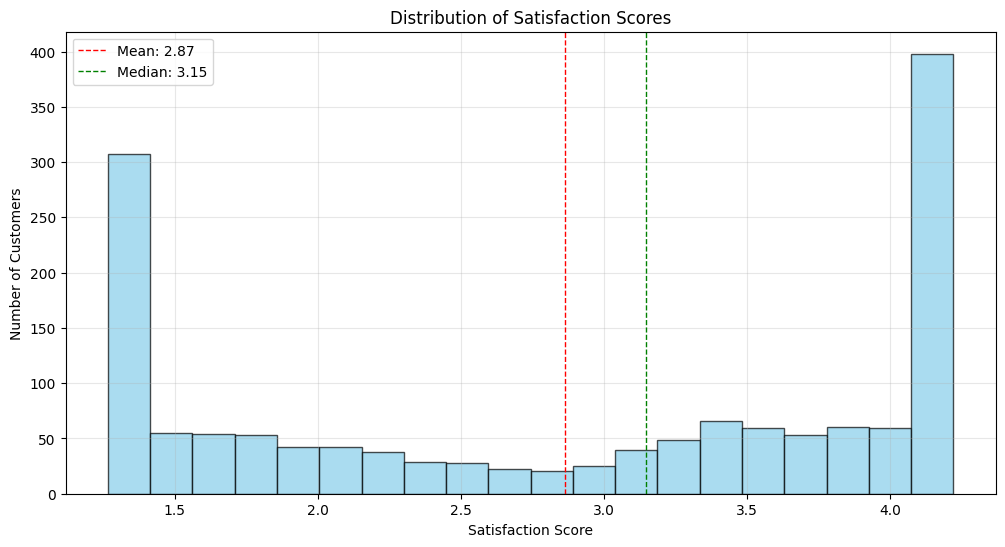


Satisfaction Category Counts:
satisfaction_category
Low       628
Medium    442
High      430
Name: count, dtype: int64


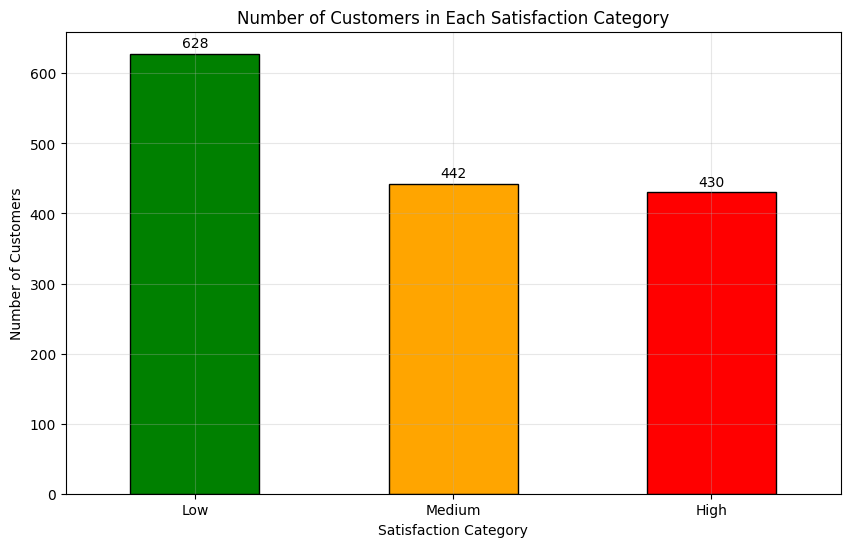

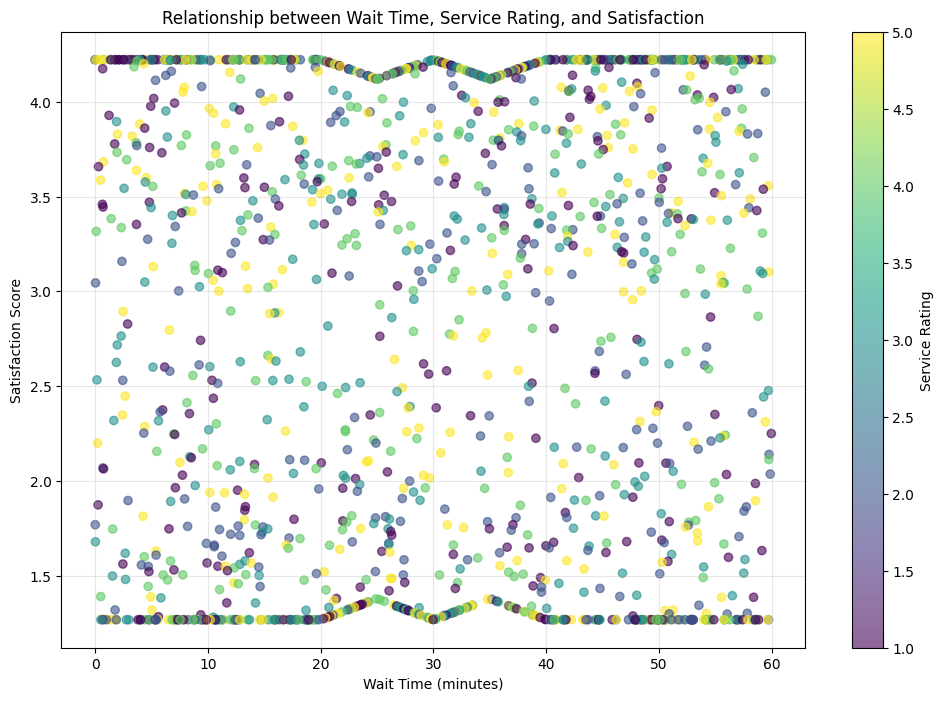

In [8]:

# Plot distribution of satisfaction scores
plt.figure(figsize=(12, 6))
plt.hist(finaldata['satisfaction'].dropna(), bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Satisfaction Scores')
plt.xlabel('Satisfaction Score')
plt.ylabel('Number of Customers')
plt.grid(True, alpha=0.3)
plt.axvline(finaldata['satisfaction'].mean(), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {finaldata["satisfaction"].mean():.2f}')
plt.axvline(finaldata['satisfaction'].median(), color='green', linestyle='dashed', linewidth=1, label=f'Median: {finaldata["satisfaction"].median():.2f}')
plt.legend()
plt.show()

# Count category
category_counts = finaldata['satisfaction_category'].value_counts()
print("\nSatisfaction Category Counts:")
print(category_counts)

# Plot bar chart by category
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color=['green', 'orange', 'red'], edgecolor='black')
plt.title('Number of Customers in Each Satisfaction Category')
plt.xlabel('Satisfaction Category')
plt.ylabel('Number of Customers')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=0)

for i, count in enumerate(category_counts):
    plt.text(i, count + 5, str(count), ha='center', va='bottom')
plt.show()

# scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(finaldata['WaitTime'], finaldata['satisfaction'], c=finaldata['ServiceRating'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Service Rating')
plt.title('Relationship between Wait Time, Service Rating, and Satisfaction')
plt.xlabel('Wait Time (minutes)')
plt.ylabel('Satisfaction Score')
plt.grid(True, alpha=0.3)
plt.show()